## Deutsche Bahn Call-A-Bike Data Set

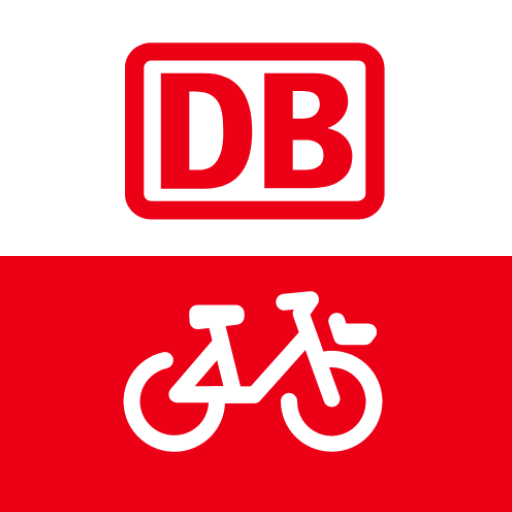



#### 1. Import and examine the data sets
##### 1.1 The Bike Trip Data (Jasmine's Data Set)
* 1.1.1 Examining the Bike Trip Data
* 1.1.2 Bike Trip Data Profile Before Cleaning
* 1.1.3 Cleaning the Bike Trip Data¶
* 1.1.4 Bike Trip Data Profile After Cleaning
##### 1.2 Rental Zone (station) Data
* 1.2.1 Examining the Rental Zone Station Data
* 1.2.2 Rental Zone Data Profile Before Cleaning
* 1.2.2 Create new dataframe Hstations and Clean
* 1.2.3 Identify the missing stations and set up a flag
#### 2. Merge the data sets to add the latitude and longitude of the start and end stations
##### 2.1 Use a left join to merge the df_Hstations_start and df_Hstations_end dataframes to the bike trip data set
* 2.1.1 Run the end station latitude and longitude merge and check with original df_trips dataframe
* 2.1.2 Run the end station latitude and longitude merge and check with the df_trips_start dataframe
#### 3. Add the Station Names
* 3.1 Check the mapping has worked correctly
* 3.2 Examine the dataframe
#### 4. Export the df_trips_stations dataframe

---

## 1. Import and examine the data sets

In [1]:
# Import python libraries

from datetime import datetime
from datetime import date
from datetime import time
import pandas as pd
import numpy as np
import os

---

### 1.1 The Bike Trip Data (Jasmine's Data Set)

#### 1.1.1 Examining the Bike Trip Data

In [2]:
# set the path and import the data

path = r'/Users/elsaekevall/Documents/Data Science/Correl_Aid/Correl_Aid_Hackathon/DB_Data/Data'
df_trips = pd.read_csv(os.path.join(path, 'biketrip_data.csv'))

In [3]:
# view first 25 rows

df_trips.head(25)

,Unnamed: 0,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,city_rental_zone,date_from,date_to,hour_from,hour_to,duration_trip_minutes
0,1,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,Hamburg,2014-01-01,2014-01-01,0,0,15.333333
1,2,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,Hamburg,2014-01-01,2014-01-01,1,1,17.533333
2,3,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,Hamburg,2014-01-01,2014-01-01,1,1,12.816667
3,4,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,Hamburg,2014-01-01,2014-01-01,2,2,7.900000
4,5,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,Hamburg,2014-01-01,2014-01-01,2,2,3.633333
5,6,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,Hamburg,2014-01-01,2014-01-01,3,3,13.016667
6,7,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,Hamburg,2014-01-01,2014-01-01,4,4,17.450000
7,8,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,Hamburg,2014-01-01,2014-01-01,4,5,13.966667
8,9,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,Hamburg,2014-01-01,2014-01-01,1,1,4.733333
9,10,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,Hamburg,2014-01-01,2014-01-01,1,1,4.216667


In [4]:
# view last 25 rows

df_trips.tail(25)

,Unnamed: 0,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,city_rental_zone,date_from,date_to,hour_from,hour_to,duration_trip_minutes
8265941,8265942,46384956,143563,0B85C74C9AFD8B9AA3E14C4CB7292DB74D87234F,2017-05-16 06:44:26,2017-05-16 07:01:21,227415,131875,Hamburg,2017-05-16,2017-05-16,6,7,16.916670
8265942,8265943,46385610,120356,94FA872E02C2B3FBF3079B0A0A24031CAE819AAF,2017-05-16 07:28:51,2017-05-16 07:35:24,140790,239807,Hamburg,2017-05-16,2017-05-16,7,7,6.550000
8265943,8265944,46386069,120347,FCC866DAF0955BAF2A080B44FCB313D0EE11A6AF,2017-05-16 07:48:00,2017-05-16 07:55:04,139498,211709,Hamburg,2017-05-16,2017-05-16,7,7,7.066667
8265944,8265945,46385504,120080,25CDA8932889FEF28ACF2F09A65684179B0B3E2A,2017-05-16 07:24:01,2017-05-16 07:43:10,131885,131889,Hamburg,2017-05-16,2017-05-16,7,7,19.150000
8265945,8265946,46385521,120379,830DAC7471C410E0F53D0121534A747B9603E2E5,2017-05-16 07:24:56,2017-05-16 07:43:10,131642,131872,Hamburg,2017-05-16,2017-05-16,7,7,18.233330
8265946,8265947,46385665,116841,45C58CDE73A5BFB195826AC5A3D401CC4C111280,2017-05-16 07:32:11,2017-05-16 07:47:39,139498,138379,Hamburg,2017-05-16,2017-05-16,7,7,15.466670
8265947,8265948,46385796,109579,9F5211038D37038AC5C7CAE1B645EE41484854FD,2017-05-16 07:38:37,2017-05-16 08:06:03,138372,252788,Hamburg,2017-05-16,2017-05-16,7,8,27.433330
8265948,8265949,46385827,143757,65A77EEFF1C487D6CD1B9C7155A8B276305DE818,2017-05-16 07:39:52,2017-05-16 07:44:24,214170,193238,Hamburg,2017-05-16,2017-05-16,7,7,4.533333
8265949,8265950,46385869,120167,9ECB3CC2999D6C9F0DC121A12D9A244EAA028313,2017-05-16 07:41:21,2017-05-16 07:48:26,139508,140793,Hamburg,2017-05-16,2017-05-16,7,7,7.083333
8265950,8265951,46383359,109115,30D76581FA2DCB672F6386EC3434F439FD84CDF7,2017-05-15 23:58:21,2017-05-16 00:06:07,214170,196417,Hamburg,2017-05-15,2017-05-16,23,0,7.766667


In [5]:
# find the data types

df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8265966 entries, 0 to 8265965
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   booking_hal_id         int64  
 2   vehicle_hal_id         int64  
 3   customer_hal_id        object 
 4   datetime_from          object 
 5   datetime_to            object 
 6   start_station_id       int64  
 7   end_station_id         int64  
 8   city_rental_zone       object 
 9   date_from              object 
 10  date_to                object 
 11  hour_from              int64  
 12  hour_to                int64  
 13  duration_trip_minutes  float64
dtypes: float64(1), int64(7), object(6)
memory usage: 882.9+ MB


In [6]:
# count the unique values in the columns

df_trips.nunique()

Unnamed: 0               8265966
booking_hal_id           8265966
vehicle_hal_id              2681
customer_hal_id           262535
datetime_from            7717564
datetime_to              7703738
start_station_id             208
end_station_id               208
city_rental_zone               1
date_from                   1232
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
dtype: int64

In [7]:
# find the unique values and counts in the city_rental_zone column

df_trips['city_rental_zone'].value_counts()

Hamburg    8265966
Name: city_rental_zone, dtype: int64

Remove city_rental_zone only 1 entry - Hamburg

---

##### 1.1.1.1 Examining the start and end station stations

In [8]:
# find the unique values and counts in the city_rental_zone column

df_trips['start_station_id'].unique()

array([214170, 131646, 211922, 140799, 208295, 208292, 200502, 213680,
       140804, 138389, 131644, 211709, 198077, 131879, 140790, 138379,
       204029, 218635, 131641, 131905, 131883, 213792, 138384, 139501,
       224650, 140795, 131888, 213235, 211921, 201326, 131639, 137995,
       213825, 203892, 131902, 140803, 213679, 212078, 131890, 131547,
       131648, 131884, 131652, 198086, 138385, 131642, 140791, 211706,
       204032, 213833, 201329, 201324, 212607, 139508, 226607, 131650,
       131543, 213688, 198088, 138376, 213277, 131546, 131654, 193238,
       138375, 139498, 131880, 140800, 131649, 163327, 131873, 140794,
       131889, 204031, 196417, 140802, 140796, 138387, 138380, 164033,
       207619, 211710, 211711, 131640, 138386, 138378, 131645, 207304,
       131882, 227770, 208307, 198081, 193381, 137994, 213855, 131643,
       211923, 171372, 138382, 138372, 140801, 140793, 199402, 203890,
       213687, 131872, 131653, 218174, 138383, 138370, 204030, 131887,
      

In [9]:
# find the unique values and counts in the city_rental_zone column

df_trips['end_station_id'].unique()

array([131880, 131648, 138376, 211923, 213833, 212607, 198086, 201326,
       131873, 139501, 193238, 138380, 198077, 131652, 140800, 131882,
       138375, 201324, 138383, 138370, 137994, 138379, 131872, 211921,
       131649, 140804, 131642, 138378, 196417, 140802, 138382, 131905,
       207619, 200502, 140796, 140794, 213825, 131654, 198088, 139498,
       137995, 131639, 213792, 218174, 131884, 140801, 213679, 140790,
       131646, 208292, 204030, 131547, 218635, 131888, 131877, 131641,
       224650, 199402, 131890, 131644, 208307, 213832, 203892, 213235,
       131889, 211922, 211710, 213688, 213855, 208295, 201329, 164033,
       131650, 203890, 131887, 140799, 131902, 212078, 140795, 131879,
       131883, 131881, 131543, 211709, 213687, 138386, 131546, 138387,
       213680, 131653, 211706, 218636, 131645, 131885, 214170, 131643,
       138385, 227770, 211711, 198081, 226607, 213277, 138384, 204029,
       140793, 193381, 138389, 171372, 138372, 204031, 227415, 139508,
      

In [10]:
# Find any unique station ids that are not in both columns

unique = df_trips['start_station_id'][~df_trips['start_station_id'].isin(df_trips['end_station_id'])].drop_duplicates()
unique

Series([], Name: start_station_id, dtype: int64)

In [11]:
# Alternative way to find unique values not in both columns

list(set(df_trips.start_station_id)-set(df_trips.end_station_id))

[]

All the stations in the start_station_id column are also in the end_station_id column (208 in each)

---

In [12]:
# Checking for duplicates

df_dup_trips = df_trips[df_trips.duplicated()]
df_dup_trips

,Unnamed: 0,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,city_rental_zone,date_from,date_to,hour_from,hour_to,duration_trip_minutes


In [13]:
# Checking for duplicate rows based on start time and bike id

df_dup_rows = df_trips[df_trips.duplicated(['vehicle_hal_id', 'datetime_from'])]
df_dup_rows

,Unnamed: 0,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,city_rental_zone,date_from,date_to,hour_from,hour_to,duration_trip_minutes


There are no duplicates

In [14]:
# Checking for missing entries

df_trips.isnull().sum()

Unnamed: 0               0
booking_hal_id           0
vehicle_hal_id           0
customer_hal_id          0
datetime_from            0
datetime_to              0
start_station_id         0
end_station_id           0
city_rental_zone         0
date_from                0
date_to                  0
hour_from                0
hour_to                  0
duration_trip_minutes    0
dtype: int64

No missing entries in the data set

---

#### 1.1.2 Bike Trip Data Profile Before Cleaning

The data set consists of 8265966 rows and 14 columns. <br>
The only city is Hamburg and there are 208 stations. <br>
The are 262535 customers and 2681 vehicles.<br>
With 8265966 bookings over 1232 days from the 01.01.2014 to the 16.05.2017. 
There are no duplicates. <br>
There are no missing values. <br>

Data cleaning steps:
1. Remove the unamed column and city_rental_zone.
2. Format booking_hal_id, vehicle_hal_id, start_station_id, end_station_id as object
3. Format datetime_from and datetime_to as datetime
4. Format date_from and date_to as date

---

#### 1.1.3 Cleaning the Bike Trip Data

In [15]:
# Remove the unamed and city_rental_zone column

df_trips = df_trips.drop(columns = ['Unnamed: 0', 'city_rental_zone'])
df_trips.head()

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333


In [16]:
# Format booking_hal_id, vehicle_hal_id, start_station_id, end_station_id as object

df_trips = df_trips.astype({'booking_hal_id': str, 'vehicle_hal_id': str, 'start_station_id': str, 'end_station_id': str})

In [17]:
# Format datetime_from, datetime_to as datetime

df_trips['datetime_from'] = pd.to_datetime(df_trips['datetime_from'])
df_trips['datetime_to'] = pd.to_datetime(df_trips['datetime_to'])

In [18]:
# Format date_from and date_to as date

df_trips['date_from'] = pd.to_datetime(df_trips['date_from'])
df_trips['date_to'] = pd.to_datetime(df_trips['date_to'])

In [19]:
# Check the data types

df_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8265966 entries, 0 to 8265965
Data columns (total 12 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   booking_hal_id         object        
 1   vehicle_hal_id         object        
 2   customer_hal_id        object        
 3   datetime_from          datetime64[ns]
 4   datetime_to            datetime64[ns]
 5   start_station_id       object        
 6   end_station_id         object        
 7   date_from              datetime64[ns]
 8   date_to                datetime64[ns]
 9   hour_from              int64         
 10  hour_to                int64         
 11  duration_trip_minutes  float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(5)
memory usage: 756.8+ MB


In [20]:
#Check for mixed-type columns

for col in df_trips.columns.tolist():
   weird = (df_trips[[col]].applymap(type) != df_trips[[col]].iloc[0].apply(type)).any(axis = 1)
   if len (df_trips[weird]) > 0:
     print (col)

In [21]:
# Recheck the first 10 rows

df_trips.head(10)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333
5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,3,3,13.016667
6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,4,4,17.450000
7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,4,5,13.966667
8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,1,1,4.733333
9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,1,1,4.216667


In [22]:
# Recheck the number of rows and columns

df_trips.shape

(8265966, 12)

Same number of rows  8265966 and now 12 columns

In [23]:
# Find the first date

df_trips['date_from'].agg(['min', 'max'])

min   2014-01-01
max   2017-05-16
Name: date_from, dtype: datetime64[ns]

In [24]:
# Find the last date

df_trips['date_to'].agg(['min', 'max'])

min   2014-01-01
max   2017-05-16
Name: date_to, dtype: datetime64[ns]

In [25]:
# Check the first date

df_trips['datetime_from'].agg(['min', 'max'])

min   2014-01-01 00:02:51
max   2017-05-16 08:08:09
Name: datetime_from, dtype: datetime64[ns]

In [26]:
# Check the last date

df_trips['datetime_to'].agg(['min', 'max'])

min   2014-01-01 00:10:48
max   2017-05-16 08:14:13
Name: datetime_to, dtype: datetime64[ns]

The first and last dates are the same for the dates columns and the original datetime column

In [27]:
# Recount the unique values in the columns

df_trips.nunique()

booking_hal_id           8265966
vehicle_hal_id              2681
customer_hal_id           262535
datetime_from            7717564
datetime_to              7703738
start_station_id             208
end_station_id               208
date_from                   1232
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
dtype: int64

In [28]:
# Describe the non string and date entries in the data set

df_trips.describe()

,hour_from,hour_to,duration_trip_minutes
count,8.265966e+06,8.265966e+06,8.265966e+06
mean,1.409498e+01,1.426006e+01,1.887598e+01
std,5.390333e+00,5.480830e+00,2.340789e+01
min,0.000000e+00,0.000000e+00,3.016667e+00
25%,1.000000e+01,1.100000e+01,8.266667e+00
50%,1.500000e+01,1.500000e+01,1.345000e+01
75%,1.800000e+01,1.800000e+01,2.133333e+01
max,2.300000e+01,2.300000e+01,2.999833e+02


---

#### 1.1.4 Bike Trip Data Profile After Cleaning

The data set consists of 8265966 rows and 12 columns. <br>
The only city is Hamburg and there are 208 stations. <br>
The are 262535 customers and 2681 vehicles.<br>
With 8265966 bookings over 1232 days from the 01.01.2014 to the 16.05.2017.<br>
The earliest hour is 0:00 (midnight) and the latest 23:00.<br>
The shortest duration is around 3 minutes and the longest around 300 minutes.<br>

**Need to check that there are 208 stations in Hamburg in the station data.** <br>

---

### 1.2 Rental Zone (station) Data

In [29]:
# Importing the data raised a tokenising error therefore added the separator (sep=";") and stated that there is a header (header=0)

df_stations = pd.read_csv(os.path.join(path, 'OPENDATA_RENTAL_ZONE_CALL_A_BIKE.csv'), sep=";", header=0)

#### 1.2.1 Examining the Rental Zone Station Data

In [30]:
# View the first 25 rows

df_stations.head(25)

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
0,354,Standort,Münchner Freiheit,8.800131e+07,normal,München,Deutschland,"11,586111110000000","48,161944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1,388,Standort,Ostbahnhof,8.800166e+07,normal,München,Deutschland,"11,604444440000000","48,128611110000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
2,499,Standort,DB_MobilityCenter,8.800290e+07,normal,München,Deutschland,NaN,NaN,Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
3,1532,Standort,Stiglmaierplatz,8.800655e+07,normal,München,Deutschland,"11,558888890000000","48,146944440000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
4,1559,Standort,DB_MobilityCenter,8.800683e+07,normal,München,Deutschland,"11,575277780000000","48,160277780000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
5,1589,Standort,LMU Projektstandort 5,8.800714e+07,normal,München,Deutschland,"11,595277780000000","48,150555560000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
6,1610,Standort,Kurfürstenplatz,8.800732e+07,normal,München,Deutschland,"11,575277780000000","48,159722220000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
7,1735,Standort,Zülpicher Platz/Friedrichstr.,4.002790e+07,normal,Köln,Deutschland,"6,939332934200000","50,930237905400000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
8,1784,Standort,Mediapark,4.002833e+07,normal,Köln,Deutschland,"6,942899402100000","50,946266014500000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
9,1797,Standort,The Coffee Store,4.002845e+07,normal,Köln,Deutschland,"6,952250420600000","50,939732973000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike


In [31]:
# View the last 25 rows

df_stations.tail(25)

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
1037,258993,Standort,Rathaus/Berliner Straße,6.306500e+09,normal,Frankfurt am Main,Deutschland,"8,761910000000000","50,105920000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1038,258994,Standort,Berliner Straße/Marktplatz,6.306500e+09,normal,Frankfurt am Main,Deutschland,"8,764810000000000","50,105550000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1039,258995,Standort,Kaiserstraße/Bismarckstraße,6.306500e+09,normal,Frankfurt am Main,Deutschland,"8,760530000000000","50,099800000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1040,258996,Standort,Starkenburgring/Klinikum Offenbach,6.306900e+09,normal,Frankfurt am Main,Deutschland,"8,755880000000000","50,096300000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1041,258998,Standort,Bahnhof Offenbach Ost/Lämmerspieler Weg,6.307100e+09,normal,Frankfurt am Main,Deutschland,"8,784160000000000","50,102460000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1042,258999,Standort,Anhalter Straße / Rumpenheimer Straße,6.307500e+09,normal,Frankfurt am Main,Deutschland,"8,790240000000000","50,124140000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1043,259000,Standort,Brunnenweg/Wilhelm-Schramm-Straße,6.307100e+09,normal,Frankfurt am Main,Deutschland,"8,783610000000000","50,083680000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1044,259001,Standort,Bahnhof Bieber / Poststraße,6.307300e+09,normal,Frankfurt am Main,Deutschland,"8,808310000000000","50,090090000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1045,260945,Standort,HEAG mobilo / Depot Jägertorstraße,6.420275e+06,normal,Darmstadt,Deutschland,"8,677767000000000","49,904692000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike
1046,262958,Standort,Lincoln Mobilitätszentrale,6.420415e+06,normal,Darmstadt,Deutschland,"8,643929000000000","49,846693000000000",Nein,Nein,Nein,Nein,Ja,Call a Bike,Call a Bike


**The latitude of Hamburg 53.551086, and the longitude is 9.993682. In the above data file they are named incorrectly**

In [32]:
# find the number of rows and columns

df_stations.shape

(1062, 16)

In [33]:
# find the data types

df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RENTAL_ZONE_HAL_ID          1062 non-null   int64  
 1   RENTAL_ZONE_HAL_SRC         1062 non-null   object 
 2   NAME                        1062 non-null   object 
 3   CODE                        1047 non-null   float64
 4   TYPE                        1062 non-null   object 
 5   CITY                        1062 non-null   object 
 6   COUNTRY                     1062 non-null   object 
 7   LATITUDE                    1032 non-null   object 
 8   LONGITUDE                   1032 non-null   object 
 9   POI_AIRPORT_X               1062 non-null   object 
 10  POI_LONG_DISTANCE_TRAINS_X  1062 non-null   object 
 11  POI_SUBURBAN_TRAINS_X       1062 non-null   object 
 12  POI_UNDERGROUND_X           1062 non-null   object 
 13  ACTIVE_X                    1062 

In [34]:
# count the unique values in the columns

df_stations.nunique()

RENTAL_ZONE_HAL_ID            1062
RENTAL_ZONE_HAL_SRC              1
NAME                           811
CODE                          1047
TYPE                             1
CITY                            65
COUNTRY                          2
LATITUDE                       903
LONGITUDE                      900
POI_AIRPORT_X                    1
POI_LONG_DISTANCE_TRAINS_X       2
POI_SUBURBAN_TRAINS_X            2
POI_UNDERGROUND_X                2
ACTIVE_X                         1
COMPANY                          3
COMPANY_GROUP                    1
dtype: int64

In [35]:
# Checking for missing entries

df_stations.isnull().sum()

RENTAL_ZONE_HAL_ID             0
RENTAL_ZONE_HAL_SRC            0
NAME                           0
CODE                          15
TYPE                           0
CITY                           0
COUNTRY                        0
LATITUDE                      30
LONGITUDE                     30
POI_AIRPORT_X                  0
POI_LONG_DISTANCE_TRAINS_X     0
POI_SUBURBAN_TRAINS_X          0
POI_UNDERGROUND_X              0
ACTIVE_X                       0
COMPANY                        0
COMPANY_GROUP                  0
dtype: int64

In [36]:
# Checking for duplicates

df_dup_stations = df_stations[df_stations.duplicated()]
df_dup_stations

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP


There are no duplicates

In [37]:
# Check the cities to see if Hamburg is included

df_stations['CITY'].unique()

array(['München', 'Köln', 'Frankfurt am Main', 'Stuttgart', 'Bonn',
       'Düsseldorf', 'Braunschweig', 'Hannover', 'Mannheim', 'Mainz',
       'Freiburg', 'Bremen', 'Oldenburg (Oldb)', 'Weimar', 'Fulda',
       'Aschaffenburg', 'Bamberg', 'Darmstadt', 'Erlangen', 'Hanau',
       'Heidelberg', 'Magdeburg', 'Würzburg', 'Hamburg', 'Warnemünde',
       'Rostock', 'Lübeck', 'Halle', 'Göttingen', 'Kiel', 'Ingolstadt',
       'Bielefeld', 'Gütersloh', 'Kaiserslautern', 'Saarbrücken',
       'Oberhausen', 'Zürich', 'Chur', 'Davos', 'Genf', 'Brigg',
       'Interlaken', 'Grindelwald', 'Zermatt', 'Göschenen', 'Andermatt',
       'Lausanne', 'Thun', 'Spiez', 'Winterthur', 'St. Gallen', 'Biel',
       'Sion', 'Lugano', 'Bellinzona', 'Kassel', 'Flugh. Frankfurt',
       'Troisdorf', 'Freiham', 'Wiesbaden', 'Rüsselsheim', 'Marburg',
       'Karlsruhe', 'Hennef', 'Baden-Baden'], dtype=object)

Hamburg is included in the station data

In [38]:
#Use groupby and get-group to count the number of observations for Hamburg 

df_stations.groupby('CITY').get_group('Hamburg').count()

RENTAL_ZONE_HAL_ID            207
RENTAL_ZONE_HAL_SRC           207
NAME                          207
CODE                          207
TYPE                          207
CITY                          207
COUNTRY                       207
LATITUDE                      206
LONGITUDE                     206
POI_AIRPORT_X                 207
POI_LONG_DISTANCE_TRAINS_X    207
POI_SUBURBAN_TRAINS_X         207
POI_UNDERGROUND_X             207
ACTIVE_X                      207
COMPANY                       207
COMPANY_GROUP                 207
dtype: int64

In [39]:
# Use groupby and get-group to see the number of unique observations for Hamburg 

df_stations.groupby('CITY').get_group('Hamburg').nunique()

RENTAL_ZONE_HAL_ID            207
RENTAL_ZONE_HAL_SRC             1
NAME                          207
CODE                          207
TYPE                            1
CITY                            1
COUNTRY                         1
LATITUDE                      206
LONGITUDE                     205
POI_AIRPORT_X                   1
POI_LONG_DISTANCE_TRAINS_X      1
POI_SUBURBAN_TRAINS_X           2
POI_UNDERGROUND_X               2
ACTIVE_X                        1
COMPANY                         1
COMPANY_GROUP                   1
dtype: int64

Some of the stations have the same longitude (205 and not 207) and two stations have the same latitude (206 not 207). <br>
Remove all the POI columns and those with only one observation.

In [40]:
# Use groupby and get-group to find the COUNTRY name 

df_stations.groupby('CITY').get_group('Hamburg')['COUNTRY'].value_counts()

Deutschland    207
Name: COUNTRY, dtype: int64

In [41]:
# Use groupby and get-group to find the TYPE

df_stations.groupby('CITY').get_group('Hamburg')['TYPE'].value_counts()

normal    207
Name: TYPE, dtype: int64

In [42]:
# Use groupby and get-group to find the value for ACTIVE_X

df_stations.groupby('CITY').get_group('Hamburg')['ACTIVE_X'].value_counts()

Ja    207
Name: ACTIVE_X, dtype: int64

In [43]:
# Use groupby and get-group to find the value for COMPANY

df_stations.groupby('CITY').get_group('Hamburg')['COMPANY'].value_counts()

StadtRAD Hamburg    207
Name: COMPANY, dtype: int64

In [44]:
# Use groupby and get-group to find the value for COMAPNY_GROUP

df_stations.groupby('CITY').get_group('Hamburg')['COMPANY_GROUP'].value_counts()

Call a Bike    207
Name: COMPANY_GROUP, dtype: int64

---

#### 1.2.2 Rental Zone Data Profile Before Cleaning

The data set consists of 1062 rows and 16 columns. <br>
The are 65 cities in 2 countries and 1062 stations. <br>

There are no duplicates.<br>
Both the Latitude and Longitude columns have null values.<br>
**Check the missing latitude and longitude for one station in the Hamburg subset**

Data cleaning steps:
1. Filter to keep only the information on Hamburg and remove all other cities.
2. Change RENTAL_ZONE_HAL_ID and CODE to string
3. Remove uneccessary columns with one entry - RENTAL_ZONE_HAL_SRC (Standort), TYPE(normal), CITY(Hamburg), COUNTRY(Deutschland), ACTIVE_X (Ja), COMPANY (StadtRAD Hamburg) and COMPANY_GROUP (Call a Bike )

---

#### 1.2.2 Create new dataframe Hstations and Clean

In [45]:
# Create a new dataframe containing only Hamburg

df_Hstations = df_stations.loc[df_stations['CITY'] == 'Hamburg']
df_Hstations

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
348,129477,Standort,Teststandort für interne Tests,54321.0,normal,Hamburg,Deutschland,NaN,NaN,Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
350,131543,Standort,Landungsbrücke/Hafentor,2621.0,normal,Hamburg,Deutschland,"9,972300000000000","53,545700000000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
351,131546,Standort,Fischmarkt/Breite Straße,2112.0,normal,Hamburg,Deutschland,"9,950880000000000","53,546200000000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
352,131547,Standort,Paulinenplatz/Wohlwillstraße,2613.0,normal,Hamburg,Deutschland,"9,962460000000000","53,554200000000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
353,131639,Standort,Burgstraße/Hammer Landstraße,2561.0,normal,Hamburg,Deutschland,"10,041298000000000","53,555693000000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,256467,Standort,Röntgenstraße/Philips,2396.0,normal,Hamburg,Deutschland,"10,012208800000000","53,623480900000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
1048,264330,Standort,Bleickenallee/Kinderkrankenhaus Altona,2128.0,normal,Hamburg,Deutschland,"9,912913400000000","53,551288100000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
1050,264820,Standort,Osterstraße/Heußweg,2228.0,normal,Hamburg,Deutschland,"9,952070900000000","53,575983100000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike
1051,264821,Standort,Bahrenfelder Chaussee/Von-Sauer-Straße,2080.0,normal,Hamburg,Deutschland,"9,910869600000000","53,565972900000000",Nein,Nein,Nein,Nein,Ja,StadtRAD Hamburg,Call a Bike


In [46]:
# Reomve unnecessary columns RENTAL_ZONE_HAL_SRC (Standort), TYPE(normal), CITY(Hamburg), COUNTRY(Deutschland), ACTIVE_X (Ja), COMPANY (StadtRAD Hamburg) and COMPANY_GROUP (Call a Bike )

df_Hstations = df_Hstations.drop(columns =['RENTAL_ZONE_HAL_SRC', 'TYPE', 'CITY', 'COUNTRY', 'POI_AIRPORT_X', 'POI_LONG_DISTANCE_TRAINS_X', 'POI_SUBURBAN_TRAINS_X', 'POI_UNDERGROUND_X', 'ACTIVE_X', 'COMPANY', 'COMPANY_GROUP'])
df_Hstations

,RENTAL_ZONE_HAL_ID,NAME,CODE,LATITUDE,LONGITUDE
348,129477,Teststandort für interne Tests,54321.0,NaN,NaN
350,131543,Landungsbrücke/Hafentor,2621.0,"9,972300000000000","53,545700000000000"
351,131546,Fischmarkt/Breite Straße,2112.0,"9,950880000000000","53,546200000000000"
352,131547,Paulinenplatz/Wohlwillstraße,2613.0,"9,962460000000000","53,554200000000000"
353,131639,Burgstraße/Hammer Landstraße,2561.0,"10,041298000000000","53,555693000000000"
...,...,...,...,...,...
1023,256467,Röntgenstraße/Philips,2396.0,"10,012208800000000","53,623480900000000"
1048,264330,Bleickenallee/Kinderkrankenhaus Altona,2128.0,"9,912913400000000","53,551288100000000"
1050,264820,Osterstraße/Heußweg,2228.0,"9,952070900000000","53,575983100000000"
1051,264821,Bahrenfelder Chaussee/Von-Sauer-Straße,2080.0,"9,910869600000000","53,565972900000000"


In [47]:
# Format booking_hal_id, vehicle_hal_id, start_station_id, end_station_id as object

df_Hstations = df_Hstations.astype({'RENTAL_ZONE_HAL_ID': str, 'CODE': str})

In [48]:
# find the data types

df_Hstations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 348 to 1056
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   RENTAL_ZONE_HAL_ID  207 non-null    object
 1   NAME                207 non-null    object
 2   CODE                207 non-null    object
 3   LATITUDE            206 non-null    object
 4   LONGITUDE           206 non-null    object
dtypes: object(5)
memory usage: 9.7+ KB


Store Latitude and Longitude as a string just now and convert later if required.

In [49]:
# count the unique values in the columns

df_Hstations.nunique()

RENTAL_ZONE_HAL_ID    207
NAME                  207
CODE                  207
LATITUDE              206
LONGITUDE             205
dtype: int64

In [50]:
# Checking for missing entries

df_Hstations.isnull().sum()

RENTAL_ZONE_HAL_ID    0
NAME                  0
CODE                  0
LATITUDE              1
LONGITUDE             1
dtype: int64

In [51]:
# Create a dataframe for the missing values

df_null_lat = df_Hstations[df_Hstations[('LATITUDE')].isnull() == True]
df_null_lat

,RENTAL_ZONE_HAL_ID,NAME,CODE,LATITUDE,LONGITUDE
348,129477,Teststandort für interne Tests,54321.0,NaN,NaN


In [52]:
# Create a dataframe for the missing values

df_null_long = df_Hstations[df_Hstations[('LONGITUDE')].isnull() == True]
df_null_long

,RENTAL_ZONE_HAL_ID,NAME,CODE,LATITUDE,LONGITUDE
348,129477,Teststandort für interne Tests,54321.0,NaN,NaN


*The missing Latitude and Longitude values are a 'Teststandort für interne Tests' on the same row 348 - remove this row*

In [53]:
# Remove row 348

df_Hstations = df_Hstations.drop(348)

In [54]:
# Rechecking the dataframe for missing entries

df_Hstations.isnull().sum()

RENTAL_ZONE_HAL_ID    0
NAME                  0
CODE                  0
LATITUDE              0
LONGITUDE             0
dtype: int64

In [55]:
# Recount the unique values in the columns

df_Hstations.nunique()

RENTAL_ZONE_HAL_ID    206
NAME                  206
CODE                  206
LATITUDE              206
LONGITUDE             205
dtype: int64

Two stations have the same longitude (205 not 206). <br>

In [56]:
# Examine the NAME column

df_Hstations['NAME'].value_counts()

Landungsbrücke/Hafentor                  1
Fuhlsbüttler Straße/Hellbrookstraße      1
Reeseberg/EBV-Anzengruberstraße          1
Moorstraße/Bahnhof Harburg               1
Herbert-Wehner-Platz/Großer Schippsee    1
                                        ..
Unilever/Strandkai                       1
Bernhard-Nocht-Straße/Zirkusweg          1
Allende-Platz/Grindelhof                 1
Alsterschwimmhalle/Ifflandstraße         1
Sieldeich/ Gresham Carat Hotel           1
Name: NAME, Length: 206, dtype: int64

Remove the NAME column for the analysis - can add back in at the end if required.

In [57]:
# find the number of rows and columns

df_Hstations.shape

(206, 5)

---

##### 1.2.2.1  Create dataframes for the start and end latitudes

Correct the latitude and longitude in the new file for Hamburg, Germany should be  53.551086, and the longitude is 9.993682. And save as float.

In [58]:
# Create a new data set with the start_station_id, latitude and longitude

df_Hstations_start = df_Hstations.loc[:, ['RENTAL_ZONE_HAL_ID', 'LATITUDE', 'LONGITUDE']]
df_Hstations_start.rename(columns = {'RENTAL_ZONE_HAL_ID': 'start_station_id', 'LONGITUDE': 'start_latitude', 'LATITUDE': 'start_longitude'}, inplace = True)

# convert to float
df_Hstations_start['start_latitude'] = df_Hstations_start['start_latitude'].str.replace(',', '.').astype('float')
df_Hstations_start['start_longitude'] = df_Hstations_start['start_longitude'].str.replace(',', '.').astype('float')

df_Hstations_start.head(60)

,start_station_id,start_longitude,start_latitude
350,131543,9.972300,53.545700
351,131546,9.950880,53.546200
352,131547,9.962460,53.554200
353,131639,10.041298,53.555693
354,131640,9.982110,53.577248
355,131641,9.963063,53.577579
356,131642,9.962395,53.573183
357,131643,9.963090,53.569500
358,131644,9.953400,53.566200
359,131645,9.934844,53.547905


In [59]:
# Create a new end stations data frame and rename the columns

df_Hstations_end = df_Hstations.loc[:,['RENTAL_ZONE_HAL_ID', 'LATITUDE', 'LONGITUDE']]
df_Hstations_end.rename(columns = {'RENTAL_ZONE_HAL_ID': 'end_station_id', 'LONGITUDE': 'end_latitude', 'LATITUDE': 'end_longitude'}, inplace = True)

# convert to float
df_Hstations_end['end_latitude'] = df_Hstations_end['end_latitude'].str.replace(',', '.').astype('float')
df_Hstations_end['end_longitude'] = df_Hstations_end['end_longitude'].str.replace(',', '.').astype('float')

df_Hstations_end.head(60)

,end_station_id,end_longitude,end_latitude
350,131543,9.972300,53.545700
351,131546,9.950880,53.546200
352,131547,9.962460,53.554200
353,131639,10.041298,53.555693
354,131640,9.982110,53.577248
355,131641,9.963063,53.577579
356,131642,9.962395,53.573183
357,131643,9.963090,53.569500
358,131644,9.953400,53.566200
359,131645,9.934844,53.547905


##### *The Rental Zone dataset has 206 stations and the Bike Trip dataset has 208*

---

#### 1.2.3 Identify the missing stations and set up a flag

In [60]:
# Find any unique station ids that are not in both data sets 

list(set(df_trips.start_station_id)-set(df_Hstations.RENTAL_ZONE_HAL_ID))

['138370', '242731']

In [61]:
# Alternative way to find any unique station ids that are not in both data sets 

list(set(df_trips.end_station_id)-set(df_Hstations.RENTAL_ZONE_HAL_ID))

['138370', '242731']

In [62]:
# Show the unique stations and do a visual check

df_Hstations['RENTAL_ZONE_HAL_ID'].unique()

array(['131543', '131546', '131547', '131639', '131640', '131641',
       '131642', '131643', '131644', '131645', '131646', '131647',
       '131648', '131649', '131650', '131651', '131652', '131653',
       '131654', '131872', '131873', '131875', '131877', '131879',
       '131880', '131881', '131882', '131883', '131884', '131885',
       '131887', '131888', '131889', '131890', '131902', '131905',
       '137994', '137995', '138372', '138375', '138376', '138378',
       '138379', '138380', '138382', '138383', '138384', '138385',
       '138386', '138387', '138389', '139498', '139501', '139508',
       '140790', '140791', '140793', '140794', '140795', '140796',
       '140799', '140800', '140801', '140802', '140803', '140804',
       '158204', '163327', '164033', '171372', '193238', '193381',
       '196417', '198077', '198081', '198086', '198088', '199402',
       '200502', '201324', '201326', '201328', '201329', '203890',
       '203892', '204029', '204030', '204031', '204032', '2073

##### *The missing stations are id '138370' and '242731'*

In [63]:
# Check the missing columns are not in the station data set under another city

df_stations[(df_stations.RENTAL_ZONE_HAL_ID == '242731') | (df_stations.RENTAL_ZONE_HAL_ID == '138370')] 

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP


The missing stations '138370' and '242731' are not in the stations dataframe

In [64]:
# Find any unique station ids that are not in both columns for the start station

df_trips['start_station_id'][~df_trips['start_station_id'].isin(df_Hstations['RENTAL_ZONE_HAL_ID'])].drop_duplicates()

606        138370
2681592    242731
Name: start_station_id, dtype: object

In [65]:
# Find any unique station ids that are not in both columns for the end station

df_trips['end_station_id'][~df_trips['end_station_id'].isin(df_Hstations['RENTAL_ZONE_HAL_ID'])].drop_duplicates()

20         138370
2680757    242731
Name: end_station_id, dtype: object

In [66]:
# Show the trips that have the start station missing 

df_trips[(df_trips.start_station_id == '242731') | (df_trips.start_station_id == '138370')]

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes
606,21369429,120413,6438AF30DBD6CB3B2DDC9D6DE65BCAC1964AC953,2014-01-01 14:41:00,2014-01-01 15:08:31,138370,131873,2014-01-01,2014-01-01,14,15,27.516667
683,21368877,120324,B7B3E7264A1D0DAAC07513D598169531D95EFF69,2014-01-01 13:27:55,2014-01-01 13:46:23,138370,213855,2014-01-01,2014-01-01,13,13,18.466667
840,21370792,120409,4BF7D2F25F1A4592E83AC1B67CA98C744A8E2F43,2014-01-01 17:38:08,2014-01-01 17:46:02,138370,138370,2014-01-01,2014-01-01,17,17,7.900000
868,21369433,120229,6438AF30DBD6CB3B2DDC9D6DE65BCAC1964AC953,2014-01-01 14:41:34,2014-01-01 15:08:51,138370,131873,2014-01-01,2014-01-01,14,15,27.283333
1794,21370737,120589,23FEC473A3D2325C16BA00AC3AD47C41062EF0A8,2014-01-01 17:28:09,2014-01-01 17:45:58,138370,131902,2014-01-01,2014-01-01,17,17,17.816667
...,...,...,...,...,...,...,...,...,...,...,...,...
7928128,45336428,113208,5CDBAE26E8EF88241FB7ABF0704724F5966D9381,2017-04-04 15:40:03,2017-04-04 15:58:01,138370,131881,2017-04-04,2017-04-04,15,15,17.966670
7928133,45336528,119990,5CDBAE26E8EF88241FB7ABF0704724F5966D9381,2017-04-04 15:43:08,2017-04-04 15:58:44,138370,131881,2017-04-04,2017-04-04,15,15,15.600000
7928933,45336008,110002,E38957AE5305839A81152E6DCB3471DFFE918488,2017-04-04 15:27:42,2017-04-04 15:43:53,138370,131889,2017-04-04,2017-04-04,15,15,16.183330
7930117,45340105,109009,63488E6D6FF0AC899276088480EBF44E19D64C9B,2017-04-04 17:16:47,2017-04-04 17:43:49,138370,137995,2017-04-04,2017-04-04,17,17,27.033330


In [67]:
# Show the trips that have the end station missing 

missing_end = df_trips[(df_trips.end_station_id == '242731') | (df_trips.end_station_id == '138370')]
missing_end

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes
20,21367592,120229,E0BE807ECF29B794CE4ACB457EAF6F602CC0DFA4,2014-01-01 03:59:26,2014-01-01 04:10:09,131641,138370,2014-01-01,2014-01-01,3,4,10.716667
123,21368087,120409,665D79F269FA03F84FC61F3A7F7B078D7392EC0E,2014-01-01 07:08:23,2014-01-01 07:17:18,131888,138370,2014-01-01,2014-01-01,7,7,8.916667
441,21367735,120324,56647303BE9F9FFB51E142D88C7AD5C4CA6A6A1C,2014-01-01 04:31:13,2014-01-01 04:54:28,131879,138370,2014-01-01,2014-01-01,4,4,23.250000
613,21367737,120413,56647303BE9F9FFB51E142D88C7AD5C4CA6A6A1C,2014-01-01 04:31:58,2014-01-01 04:54:01,131879,138370,2014-01-01,2014-01-01,4,4,22.050000
840,21370792,120409,4BF7D2F25F1A4592E83AC1B67CA98C744A8E2F43,2014-01-01 17:38:08,2014-01-01 17:46:02,138370,138370,2014-01-01,2014-01-01,17,17,7.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
7923720,45320721,143734,23469D82FCC7CFE7F7CB8BF5987C009BAAA05255,2017-04-03 23:20:25,2017-04-03 23:27:36,139501,138370,2017-04-03,2017-04-03,23,23,7.183333
7924572,45321218,120388,1A8FC2AF794DB6F96380806802AD8A6F7C32FB1A,2017-04-04 00:47:56,2017-04-04 00:59:00,201324,138370,2017-04-04,2017-04-04,0,0,11.066670
7924982,45326528,119741,F1CDA98866FE5E627524003D726680841EB7322A,2017-04-04 08:59:50,2017-04-04 09:12:46,140796,138370,2017-04-04,2017-04-04,8,9,12.933330
7926028,45319687,113185,DB1BDC59E66AB861D6742FA196D8E506CF2E66AB,2017-04-03 21:54:34,2017-04-03 21:59:45,198086,138370,2017-04-03,2017-04-03,21,21,5.183333


In [68]:
# Create a missing station flag

df_trips.loc[(df_trips['start_station_id'] == '242731') | (df_trips['start_station_id'] == '138370'), 'station_status'] = 'missing start' # if the start station is one of the missing stations
df_trips.loc[(df_trips['end_station_id'] == '242731') | (df_trips['end_station_id'] == '138370'), 'station_status'] = 'missing end'    # if the end station is one of the missing stations
df_trips.loc[(df_trips['end_station_id'].str == ('242731' or '138370')) | (df_trips['end_station_id'] == ('242731' or '138370')), 'station_status'] = 'missing both' # if the start station and the end station is one of the missing stations in 

In [69]:
# Count the missing stations

df_trips['station_status'].value_counts(dropna = False)

NaN              8200227
missing start      32148
missing end        29619
missing both        3972
Name: station_status, dtype: int64

In [70]:
# View the first 60 rows 

df_trips[['start_station_id', 'end_station_id', 'station_status']].head(60)

,start_station_id,end_station_id,station_status
0,214170,131880,NaN
1,131646,131648,NaN
2,211922,138376,NaN
3,140799,211923,NaN
4,208295,213833,NaN
5,208292,212607,NaN
6,200502,198086,NaN
7,213680,201326,NaN
8,140804,198086,NaN
9,138389,131873,NaN


In [71]:
# Compare the shape of the dataset with the original (8265966, 12) 

df_trips.shape

(8265966, 13)

The df_trips data frame has 8265966 rows and 13 columns including the station status flag.

---

## 2. Merge the data sets to add the latitude and longitude of the start and end stations

### 2.1 Use a left join to merge the df_Hstations_start and df_Hstations_end dataframes to the bike trip data set

Keeps all the information in the bike trip data set and merges the start and end station latitude and longitude on to the end of the dataframe. 

#### 2.1.1 Run the end station latitude and longitude merge and check with original df_trips dataframe

In [72]:
# Test a left join merge of df_trips with df_Hstations_start without overwriting

pd.merge(df_trips, df_Hstations_start, how = 'left', on = ['start_station_id'], indicator = True)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,_merge
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,both
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,both
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,both
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,both
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709,both
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100,both
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796,both
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121,both


In [73]:
# Find the latitude and longitude of the first and three of the last stations (and compare with the information above)

start_station =  df_Hstations_start[df_Hstations_start['start_station_id'].isin(['214170', '131646', '211922', '201326', '131650', '131648'])]
start_station

,start_station_id,start_longitude,start_latitude
360,131646,9.936005,53.552121
362,131648,9.960990,53.562709
364,131650,9.942410,53.547100
463,201326,9.953073,53.577796
544,211922,10.033846,53.580004
561,214170,9.980896,53.544279


The test merge appears to have worked and the correct stations have been mapped. 

In [74]:
# Merge df_trips and df_Hstations_start using a left join, add a merge flag

df_trips_start = df_trips.merge(df_Hstations_start, how = 'left', on = ['start_station_id'], indicator = True)
df_trips_start

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,_merge
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,both
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,both
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,both
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,both
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709,both
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100,both
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796,both
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121,both


In [75]:
# Check the values in the dataframe compare with the original - see box below

df_trips_start.nunique()

booking_hal_id           8265966
vehicle_hal_id              2681
customer_hal_id           262535
datetime_from            7717564
datetime_to              7703738
start_station_id             208
end_station_id               208
date_from                   1232
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
_merge                         2
dtype: int64

Original data

* booking_hal_id           8265966
* vehicle_hal_id              2681
* customer_hal_id           262535
* datetime_from            7717564
* datetime_to              7703738
* start_station_id             208
* end_station_id               208
* date_from                   1232
* date_to                     1232
* hour_from                     24
* hour_to                       24
* duration_trip_minutes      28002

In [76]:
# Check the shape of the data after the merge and compare with the original before the merge (8265966, 13)

df_trips_start.shape

(8265966, 16)

The dataframe has the same number of rows and the three new columns - start_latitude	start_longitude	_merge

In [77]:
# Check the merge column

df_trips_start['_merge'].value_counts()

both          8231773
left_only       34193
right_only          0
Name: _merge, dtype: int64

In [78]:
# Count the missing stations and compare with df_trips (NaN 8200227, missing start 32148, missing end 29619, missing both 3972)

df_trips_start['station_status'].value_counts(dropna = False)

NaN              8200227
missing start      32148
missing end        29619
missing both        3972
Name: station_status, dtype: int64

In [79]:
# Show the left only values

start_left = df_trips_start[df_trips_start['_merge'] == 'left_only']
start_left

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,_merge
606,21369429,120413,6438AF30DBD6CB3B2DDC9D6DE65BCAC1964AC953,2014-01-01 14:41:00,2014-01-01 15:08:31,138370,131873,2014-01-01,2014-01-01,14,15,27.516667,missing start,NaN,NaN,left_only
683,21368877,120324,B7B3E7264A1D0DAAC07513D598169531D95EFF69,2014-01-01 13:27:55,2014-01-01 13:46:23,138370,213855,2014-01-01,2014-01-01,13,13,18.466667,missing start,NaN,NaN,left_only
840,21370792,120409,4BF7D2F25F1A4592E83AC1B67CA98C744A8E2F43,2014-01-01 17:38:08,2014-01-01 17:46:02,138370,138370,2014-01-01,2014-01-01,17,17,7.900000,missing end,NaN,NaN,left_only
868,21369433,120229,6438AF30DBD6CB3B2DDC9D6DE65BCAC1964AC953,2014-01-01 14:41:34,2014-01-01 15:08:51,138370,131873,2014-01-01,2014-01-01,14,15,27.283333,missing start,NaN,NaN,left_only
1794,21370737,120589,23FEC473A3D2325C16BA00AC3AD47C41062EF0A8,2014-01-01 17:28:09,2014-01-01 17:45:58,138370,131902,2014-01-01,2014-01-01,17,17,17.816667,missing start,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7928128,45336428,113208,5CDBAE26E8EF88241FB7ABF0704724F5966D9381,2017-04-04 15:40:03,2017-04-04 15:58:01,138370,131881,2017-04-04,2017-04-04,15,15,17.966670,missing start,NaN,NaN,left_only
7928133,45336528,119990,5CDBAE26E8EF88241FB7ABF0704724F5966D9381,2017-04-04 15:43:08,2017-04-04 15:58:44,138370,131881,2017-04-04,2017-04-04,15,15,15.600000,missing start,NaN,NaN,left_only
7928933,45336008,110002,E38957AE5305839A81152E6DCB3471DFFE918488,2017-04-04 15:27:42,2017-04-04 15:43:53,138370,131889,2017-04-04,2017-04-04,15,15,16.183330,missing start,NaN,NaN,left_only
7930117,45340105,109009,63488E6D6FF0AC899276088480EBF44E19D64C9B,2017-04-04 17:16:47,2017-04-04 17:43:49,138370,137995,2017-04-04,2017-04-04,17,17,27.033330,missing start,NaN,NaN,left_only


In [80]:
# Find out which stations are missing latitude and longitude

start_left_unique = start_left['start_station_id'].unique()
start_left_unique

array(['138370', '242731'], dtype=object)

The stations missing latitude and longitude values are '138370', '242731' which were identified above 

In [81]:
# Remove the merge column before merging the end stations

df_trips_start.drop(columns = ['_merge'], inplace = True)
df_trips_start

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121


---

#### 2.1.2 Run the end station latitude and longitude merge and check with the df_trips_start dataframe

In [82]:
#  Test a left join merge of df_trips with df_Hstations_end without overwriting

pd.merge(df_trips_start, df_Hstations_end, how = 'left', on = ['end_station_id'], indicator = True)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,_merge
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722,both
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709,both
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000,both
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652,both
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709,9.922260,53.550966,both
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100,9.930344,53.552339,both
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796,9.944487,53.575573,both
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121,9.963824,53.558869,both


In [83]:
# Find the latitude and longitude of the first three and three of the last end stations (and compare with the information above)

end_station =  df_Hstations_end[df_Hstations_end['end_station_id'].isin(['131880', '131648', '138376', '211711', '244943', '243618'])]
end_station

,end_station_id,end_longitude,end_latitude
362,131648,9.960990,53.562709
374,131880,9.997140,53.550722
391,138376,10.021100,53.584000
541,211711,9.922260,53.550966
799,243618,9.944487,53.575573
817,244943,9.930344,53.552339


*Comparing across data sets station 131648 was one of the start stations above 9.960990 53,562709* <br>

The test merge appears to have worked and the correct stations have been mapped. 

In [84]:
# Merge df_trips and df_Hstations_end using an inner join, add a merge flag

df_trips_stations = df_trips_start.merge(df_Hstations_end, how = 'left', on = ['end_station_id'], indicator = True)
df_trips_stations

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,_merge
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722,both
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709,both
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000,both
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652,both
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709,9.922260,53.550966,both
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100,9.930344,53.552339,both
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796,9.944487,53.575573,both
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121,9.963824,53.558869,both


In [85]:
# Check the values in the dataframe compare with the original - see box below

df_trips_stations.nunique()

booking_hal_id           8265966
vehicle_hal_id              2681
customer_hal_id           262535
datetime_from            7717564
datetime_to              7703738
start_station_id             208
end_station_id               208
date_from                   1232
date_to                     1232
hour_from                     24
hour_to                       24
duration_trip_minutes      28002
station_status                 3
start_longitude              206
start_latitude               205
end_longitude                206
end_latitude                 205
_merge                         2
dtype: int64

Original data

* booking_hal_id           8265966
* vehicle_hal_id              2681
* customer_hal_id           262535
* datetime_from            7717564
* datetime_to              7703738
* start_station_id             208
* end_station_id               208
* date_from                   1232
* date_to                     1232
* hour_from                     24
* hour_to                       24
* duration_trip_minutes      28002
* station_status                 3
* start_latitude               206
* start_longitude              205

In [86]:
# Check the shape of the data after the merge and compare with the original before the merge (8265966, 15)

df_trips_stations.shape

(8265966, 18)

The dataframe has the same number of rows and the three new columns - end_latitude	end_longitude	_merge

In [87]:
# Check the merge column

df_trips_stations['_merge'].value_counts()

both          8232375
left_only       33591
right_only          0
Name: _merge, dtype: int64

In [88]:
# Count the missing stations and compare with df_trips (NaN 8200227, missing start 32148, missing end 29619, missing both 3972)

df_trips_stations['station_status'].value_counts(dropna = False)

NaN              8200227
missing start      32148
missing end        29619
missing both        3972
Name: station_status, dtype: int64

In [89]:
# Show the left only values

end_left = df_trips_stations[df_trips_stations['_merge'] == 'left_only']
end_left

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,_merge
20,21367592,120229,E0BE807ECF29B794CE4ACB457EAF6F602CC0DFA4,2014-01-01 03:59:26,2014-01-01 04:10:09,131641,138370,2014-01-01,2014-01-01,3,4,10.716667,missing end,9.963063,53.577579,NaN,NaN,left_only
123,21368087,120409,665D79F269FA03F84FC61F3A7F7B078D7392EC0E,2014-01-01 07:08:23,2014-01-01 07:17:18,131888,138370,2014-01-01,2014-01-01,7,7,8.916667,missing end,9.975346,53.558518,NaN,NaN,left_only
441,21367735,120324,56647303BE9F9FFB51E142D88C7AD5C4CA6A6A1C,2014-01-01 04:31:13,2014-01-01 04:54:28,131879,138370,2014-01-01,2014-01-01,4,4,23.250000,missing end,9.995501,53.552244,NaN,NaN,left_only
613,21367737,120413,56647303BE9F9FFB51E142D88C7AD5C4CA6A6A1C,2014-01-01 04:31:58,2014-01-01 04:54:01,131879,138370,2014-01-01,2014-01-01,4,4,22.050000,missing end,9.995501,53.552244,NaN,NaN,left_only
840,21370792,120409,4BF7D2F25F1A4592E83AC1B67CA98C744A8E2F43,2014-01-01 17:38:08,2014-01-01 17:46:02,138370,138370,2014-01-01,2014-01-01,17,17,7.900000,missing end,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7923720,45320721,143734,23469D82FCC7CFE7F7CB8BF5987C009BAAA05255,2017-04-03 23:20:25,2017-04-03 23:27:36,139501,138370,2017-04-03,2017-04-03,23,23,7.183333,missing end,9.969250,53.564227,NaN,NaN,left_only
7924572,45321218,120388,1A8FC2AF794DB6F96380806802AD8A6F7C32FB1A,2017-04-04 00:47:56,2017-04-04 00:59:00,201324,138370,2017-04-04,2017-04-04,0,0,11.066670,missing end,9.946786,53.580060,NaN,NaN,left_only
7924982,45326528,119741,F1CDA98866FE5E627524003D726680841EB7322A,2017-04-04 08:59:50,2017-04-04 09:12:46,140796,138370,2017-04-04,2017-04-04,8,9,12.933330,missing end,10.010000,53.583800,NaN,NaN,left_only
7926028,45319687,113185,DB1BDC59E66AB861D6742FA196D8E506CF2E66AB,2017-04-03 21:54:34,2017-04-03 21:59:45,198086,138370,2017-04-03,2017-04-03,21,21,5.183333,missing end,9.971720,53.581771,NaN,NaN,left_only


In [90]:
# Find out which stations are missing latitude and longitude

end_left_unique = end_left['end_station_id'].unique()
end_left_unique

array(['138370', '242731'], dtype=object)

The stations missing latitude and longitude values are '138370', '242731' which were identified above 

In [91]:
# Remove the merge column before saving the data sets

df_trips_stations.drop(columns = ['_merge'], inplace = True)
df_trips_stations

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265961,46383835,143621,FF0963FE7D54E9455B5CF1ADE5DFEF484F8C525F,2017-05-16 01:11:33,2017-05-16 01:32:16,131648,211711,2017-05-16,2017-05-16,1,1,20.716670,NaN,9.960990,53.562709,9.922260,53.550966
8265962,46384262,109115,FF7147E7A3583564085352944933642F67C4D755,2017-05-16 03:25:09,2017-05-16 03:31:05,131650,244943,2017-05-16,2017-05-16,3,3,5.933333,NaN,9.942410,53.547100,9.930344,53.552339
8265963,46385337,116255,5BB54A7EBCD7A5A88FD410A537E10160BA120BB2,2017-05-16 07:15:40,2017-05-16 07:19:49,201326,243618,2017-05-16,2017-05-16,7,7,4.150000,NaN,9.953073,53.577796,9.944487,53.575573
8265964,46385755,119663,1024F6970D5BE146588D64F6AF427E147ADC642E,2017-05-16 07:36:36,2017-05-16 07:44:16,131646,131890,2017-05-16,2017-05-16,7,7,7.666667,NaN,9.936005,53.552121,9.963824,53.558869


---

## 3. Add the Station Names

In [92]:
# Create a new dataframe for the station names and station_id

df_station_names = df_Hstations.loc[:, ['NAME', 'RENTAL_ZONE_HAL_ID']]
df_station_names['RENTAL_ZONE_HAL_ID'] = df_station_names['RENTAL_ZONE_HAL_ID'].astype(str)
df_station_names.head()

,NAME,RENTAL_ZONE_HAL_ID
350,Landungsbrücke/Hafentor,131543
351,Fischmarkt/Breite Straße,131546
352,Paulinenplatz/Wohlwillstraße,131547
353,Burgstraße/Hammer Landstraße,131639
354,Innocentiapark/Oberstraße,131640


In [93]:
# Check the data types

df_station_names.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 350 to 1056
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NAME                206 non-null    object
 1   RENTAL_ZONE_HAL_ID  206 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [94]:
# Define a blank dictionary with no elements
station_dict = {}

# Create new dictionary with the information from df_dept
for row in df_station_names.itertuples(index=True, name='Pandas'): 
    station_dict[getattr(row, "RENTAL_ZONE_HAL_ID")] = getattr(row, "NAME")
station_dict    

{'131543': 'Landungsbrücke/Hafentor',
 '131546': 'Fischmarkt/Breite Straße',
 '131547': 'Paulinenplatz/Wohlwillstraße',
 '131639': 'Burgstraße/Hammer Landstraße',
 '131640': 'Innocentiapark/Oberstraße',
 '131641': 'Goebenstraße/Eppendorfer Weg',
 '131642': 'Osterstraße/Bismarckstraße',
 '131643': 'Christuskirche/Fruchtallee',
 '131644': 'Eimsbütteler Straße/Waterloostraße',
 '131645': 'Ottenser Marktplatz/Museumsstraße',
 '131646': 'Bahnhof Altona Ost/Max-Brauer-Allee',
 '131647': 'Kurze Mühren/Spitalerstraße',
 '131648': 'Schulterblatt/Eifflerstraße',
 '131649': 'Große Bergstraße / Jessenstraße',
 '131650': 'Königstraße / Struenseestraße',
 '131651': 'Kurt-Schumacher-Allee / Nagelsweg',
 '131652': 'Berliner Tor / Berlinertordamm',
 '131653': 'Zentralbibliothek / Münzstraße',
 '131654': 'Steinstraße / Deichtorplatz',
 '131872': 'Hauptbahnhof West / Glockengießer Wall',
 '131873': 'Hauptbahnhof Ost / Hachmannplatz',
 '131875': 'Jacobikirche / Steinstraße',
 '131877': 'Meßberg / Willy-Br

In [95]:
# Use the data dictionary to map the 'RENTAL_ZONE_HAL_ID' to the station name and create a new column 'start_station_name' in the 'df_trips_stations' dataframe

df_trips_stations['start_station'] = df_trips_stations['start_station_id'].map(station_dict)
df_trips_stations.head(20)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,start_station
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722,U-Bahn Baumwall
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709,Bahnhof Altona Ost/Max-Brauer-Allee
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000,Weidestraße/Biedermannplatz
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652,Mundsburg / Schürbeker Straße
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588,Krausestraße/Eilbektal
5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,3,3,13.016667,NaN,10.020450,53.575308,10.042993,53.586958,Winterhuder Weg/ Zimmerstraße
6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,4,4,17.450000,NaN,10.013995,53.578035,9.971720,53.581771,Hofweg/Am Langenzug
7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,4,5,13.966667,NaN,9.977916,53.583795,9.953073,53.577796,Löwenstraße/Eppendorfer Weg
8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,1,1,4.733333,NaN,9.977210,53.578000,9.971720,53.581771,Isestraße / Hoheluftbrücke
9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,1,1,4.216667,NaN,10.013306,53.554216,10.007652,53.554307,Steindamm / Stralsunder Straße


In [96]:
# Use the data dictionary to map the 'CODE' to the station name and create a new column 'start_station_name' in the 'df_trips_stations' dataframe
df_trips_stations['end_station'] = df_trips_stations['end_station_id'].map(station_dict)
df_trips_stations.head(20)

,booking_hal_id,vehicle_hal_id,customer_hal_id,datetime_from,datetime_to,start_station_id,end_station_id,date_from,date_to,hour_from,hour_to,duration_trip_minutes,station_status,start_longitude,start_latitude,end_longitude,end_latitude,start_station,end_station
0,21366843,143517,A821059B555C7764A2FF801180874A2FCB326222,2014-01-01 00:34:54,2014-01-01 00:50:14,214170,131880,2014-01-01,2014-01-01,0,0,15.333333,NaN,9.980896,53.544279,9.997140,53.550722,U-Bahn Baumwall,Mönckebergstraße / Rosenstraße
1,21367069,119830,1EBC930DB407ACEAE2FDE23A6CA40492EA3DFBB2,2014-01-01 01:39:55,2014-01-01 01:57:27,131646,131648,2014-01-01,2014-01-01,1,1,17.533333,NaN,9.936005,53.552121,9.960990,53.562709,Bahnhof Altona Ost/Max-Brauer-Allee,Schulterblatt/Eifflerstraße
2,21367072,143501,7AD2C1B70137479062A6DD73815835986677BB2D,2014-01-01 01:40:20,2014-01-01 01:53:09,211922,138376,2014-01-01,2014-01-01,1,1,12.816667,NaN,10.033846,53.580004,10.021100,53.584000,Weidestraße/Biedermannplatz,Jarrestraße / Rambatzweg
3,21367155,108641,4F4F752203EA6FC872D576E9289C4E1B362E16F6,2014-01-01 02:05:55,2014-01-01 02:13:49,140799,211923,2014-01-01,2014-01-01,2,2,7.900000,NaN,10.027100,53.569600,10.029570,53.575652,Mundsburg / Schürbeker Straße,Bartholomäusstraße/Beim Alten Schützenhof
4,21367221,143829,FEA7FF33A3252EE99E58B9E15724AA861CAB1DDF,2014-01-01 02:29:03,2014-01-01 02:32:41,208295,213833,2014-01-01,2014-01-01,2,2,3.633333,NaN,10.058237,53.576238,10.049568,53.573588,Krausestraße/Eilbektal,Lortzingstraße/Friedrichsberger Straße
5,21367381,143552,60A788942F6A49BF54DB9013DB05428F897FCCCE,2014-01-01 03:07:07,2014-01-01 03:20:08,208292,212607,2014-01-01,2014-01-01,3,3,13.016667,NaN,10.020450,53.575308,10.042993,53.586958,Winterhuder Weg/ Zimmerstraße,Wiesendamm/Roggenkamp
6,21367723,143577,708275C3A732D3BD47E97F1E0AC3AE01735FA170,2014-01-01 04:27:51,2014-01-01 04:45:18,200502,198086,2014-01-01,2014-01-01,4,4,17.450000,NaN,10.013995,53.578035,9.971720,53.581771,Hofweg/Am Langenzug,Eppendorfer Weg/Hoheluftchaussee
7,21367824,143580,4FCAC2DAFF984CC2FFC85D0B87D577D266010745,2014-01-01 04:58:33,2014-01-01 05:12:31,213680,201326,2014-01-01,2014-01-01,4,5,13.966667,NaN,9.977916,53.583795,9.953073,53.577796,Löwenstraße/Eppendorfer Weg,Heußweg/Wiesenstraße
8,21366959,119948,092D25BAD64832AE3F69488573BA5C398C25B51D,2014-01-01 01:08:18,2014-01-01 01:13:02,140804,198086,2014-01-01,2014-01-01,1,1,4.733333,NaN,9.977210,53.578000,9.971720,53.581771,Isestraße / Hoheluftbrücke,Eppendorfer Weg/Hoheluftchaussee
9,21366990,120207,528147DF06D7074EA517BFAE244FC0E25CB2637C,2014-01-01 01:17:32,2014-01-01 01:21:45,138389,131873,2014-01-01,2014-01-01,1,1,4.216667,NaN,10.013306,53.554216,10.007652,53.554307,Steindamm / Stralsunder Straße,Hauptbahnhof Ost / Hachmannplatz


### 3.1 Check the mapping has worked correctly

In [97]:
# create an empty list and for each item in the list check the dictionary and append the station name

check_stations = []
station_list = ['214170', '131880', '131646', '131648', '211922', '138376']

for i in station_list:
    check = station_dict.get(i)
    check_stations.append(check)
    
check_stations

['U-Bahn Baumwall',
 'Mönckebergstraße / Rosenstraße',
 'Bahnhof Altona Ost/Max-Brauer-Allee',
 'Schulterblatt/Eifflerstraße',
 'Weidestraße/Biedermannplatz',
 'Jarrestraße / Rambatzweg']

Everything appears to have worked

### 3.2 Examine the dataframe 

In [98]:
# Check the data types

df_trips_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265966 entries, 0 to 8265965
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   booking_hal_id         object        
 1   vehicle_hal_id         object        
 2   customer_hal_id        object        
 3   datetime_from          datetime64[ns]
 4   datetime_to            datetime64[ns]
 5   start_station_id       object        
 6   end_station_id         object        
 7   date_from              datetime64[ns]
 8   date_to                datetime64[ns]
 9   hour_from              int64         
 10  hour_to                int64         
 11  duration_trip_minutes  float64       
 12  station_status         object        
 13  start_longitude        float64       
 14  start_latitude         float64       
 15  end_longitude          float64       
 16  end_latitude           float64       
 17  start_station          object        
 18  end_station           

The shape of the data after mapping the station names is 8265966 entries and 19 columns compared with after the merge (8265966, 17)

***

## 4. Export the df_trips_stations dataframe

In [100]:
# Export the dataframe to both a pickle file and csv
df_trips_stations.to_pickle(os.path.join(path, 'trips_stations.pkl'))
df_trips_stations.to_csv(os.path.join(path, 'trips_stations.csv'))